In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn kagglehub


In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler





In [ ]:
import kagglehub
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset


In [ ]:
import os
print(os.listdir(path))


['Titanic-Dataset.csv']


In [ ]:
df = pd.read_csv(f"{path}/Titanic-Dataset.csv")
print("Dataset loaded successfully!")
print(df.shape)
df.head()


Dataset loaded successfully!
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import kagglehub
import pandas as pd
import os

# Step 1: Download Titanic dataset from Kaggle
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print("Dataset Path:", path)

# Step 2: Verify downloaded files
print(os.listdir(path))

# Step 3: Load the dataset
df = pd.read_csv(f"{path}/Titanic-Dataset.csv")
print("✅ Dataset loaded successfully!")
print(df.shape)
df.head()


Using Colab cache for faster access to the 'titanic-dataset' dataset.
Dataset Path: /kaggle/input/titanic-dataset
['Titanic-Dataset.csv']
✅ Dataset loaded successfully!
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)


/tmp/ipython-input-1749209378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1749209378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])


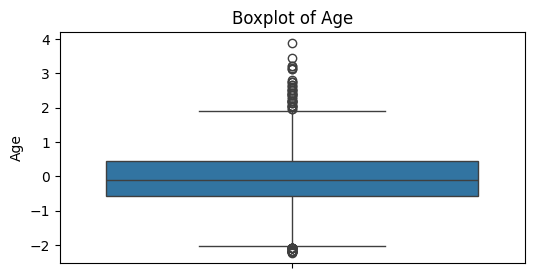

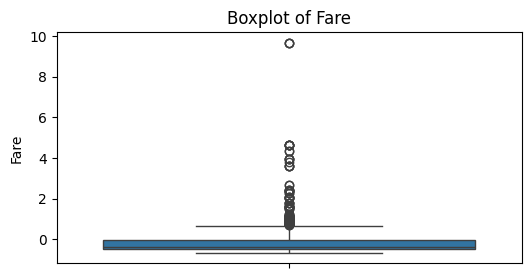

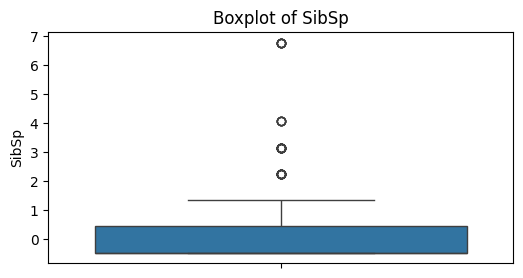

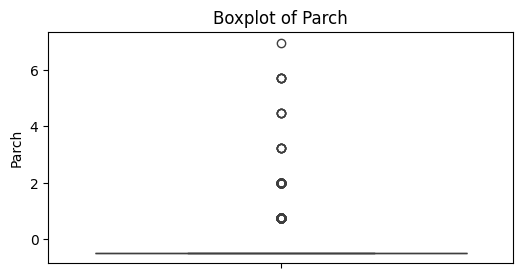

✅ Shape after removing outliers: (718, 12)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    plt.figure(figsize=(6,3))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['Age', 'Fare']:
    df = remove_outliers_iqr(df, col)

print("✅ Shape after removing outliers:", df.shape)


In [ ]:
# --- Step 9: Remove Outliers using IQR method ---
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['Age', 'Fare']:
    df = remove_outliers_iqr(df, col)

print("\n✅ Outliers removed successfully!")
print("New dataset shape:", df.shape)

# --- Step 10: Final verification ---
print("\n--- Final Dataset Info ---")
df.info()
print("\n--- Final Missing Values ---")
print(df.isnull().sum())


✅ Outliers removed successfully!
New dataset shape: (638, 12)

--- Final Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  638 non-null    int64  
 1   Survived     638 non-null    int64  
 2   Pclass       638 non-null    int64  
 3   Name         638 non-null    object 
 4   Sex          638 non-null    int64  
 5   Age          638 non-null    float64
 6   SibSp        638 non-null    float64
 7   Parch        638 non-null    float64
 8   Ticket       638 non-null    object 
 9   Fare         638 non-null    float64
 10  Embarked_Q   638 non-null    bool   
 11  Embarked_S   638 non-null    bool   
dtypes: bool(2), float64(4), int64(4), object(2)
memory usage: 56.1+ KB

--- Final Missing Values ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
